In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import util
from sklearn import manifold, datasets
from sklearn.decomposition import PCA


# Important: utiliser les données prétraitées
csv_path = 'data/dataframe.csv'

In [2]:
df = pd.read_csv(csv_path)
df.head()

,id,cps19_demsat,cps19_fed_gov_sat,cps19_prov_gov_sat,pes19_dem_sat,pes19_emb_satif,cps19_rel_imp,cps19_pos_life,cps19_pos_cannabis,cps19_pos_carbon,...,cps19_vote_2015_ndp,free_text_human_rights,free_text_environment,free_text_health care,free_text_economy,free_text_pipeline,free_text_taxes,free_text_trudeau,free_text_housing,label
0,0,0.5,-0.5,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0,1,0,0,0,0,0,0,4
1,1,0.0,-0.5,-1.0,0.0,0.0,-0.5,1.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,3
2,2,0.5,0.5,-0.5,0.0,0.0,0.5,0.0,0.0,-0.5,...,0.0,0,0,0,0,0,0,0,0,5
3,3,0.5,-0.5,0.5,0.0,0.0,0.5,1.0,-1.0,0.0,...,0.0,0,0,0,0,0,0,0,0,2
4,4,0.5,-0.5,0.5,0.0,0.0,1.0,-1.0,-0.5,0.0,...,0.0,0,0,0,0,0,1,0,0,3


In [3]:
classes = [
    'Another party (please specify)',
    'Bloc Qu<e9>b<e9>cois',
    'Conservative Party',
    "Don't know/ Prefer not to answer",
    'Green Party',
    'Liberal Party',
    'ndp',
    "People's Party"
]

custom_color = np.array([
    "r",
    "g",
    "b",
    "magenta",
    "cyan",
    "yellow",
    "black",
    "gray",
])

In [7]:
pca = PCA(n_components=2, random_state=0)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

y_pca = pca.fit_transform(x)


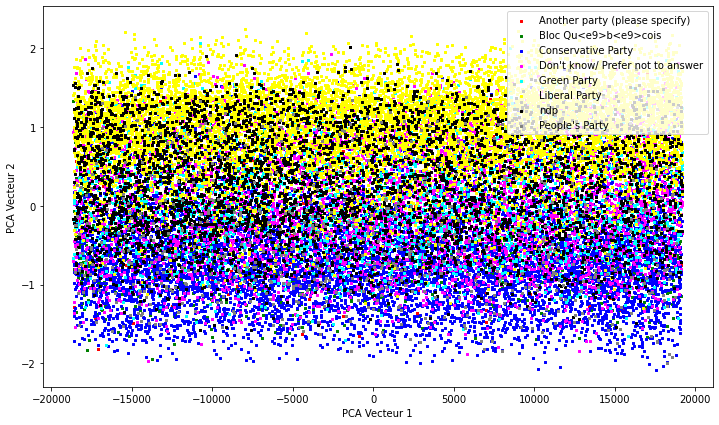

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)


for label_number in range(len(classes)):
    classe = classes[label_number]
    y_pca_classe = y_pca[(y==label_number)]
    
    ax.scatter(y_pca_classe[:,0],y_pca_classe[:,1],c=custom_color[label_number],label=classe, s=8 ,marker="s")
    
plt.legend()
plt.xlabel("PCA Vecteur 1")
plt.ylabel("PCA Vecteur 2")
plt.show()

# Analyse
Il semblerait que la PCA arrive à effectuer une séparation primaire de nos données à partir des 32 colonnes fournies: on peut voir ce qui semble être principalement un gradient 
de la droite vers la gauche avec en bas le parti conservateur et en haut plutot le parti libéral. On peut également constater que de manière assez intéressante le parti vert a tendance
à faire office d'entre deux et le NDP a plutôt tendance à tirer du côté libéral ce qui encore une fois semble cohérent avec le placement des différents partis.

In [ ]:
# tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
# x = df.iloc[:,:-1]
# y = df.iloc[:,-1]

# y_tsne = tsne.fit_transform(x)

In [ ]:
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=80)
# #fig, ax = plt.subplots()


# for label_number in range(len(classes)):
#     classe = classes[label_number]
#     y_tsne_classe = y_tsne[(y==label_number)]
    
#     plt.scatter(y_tsne_classe[:,0],y_tsne_classe[:,1],c=custom_color[label_number],label=classe, s=8,marker="s")
    
# plt.legend()
# plt.xlabel("TSNE Vecteur 1")
# plt.ylabel("TSNE Vecteur 2")
# plt.show()
